In [47]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn


In [48]:
df= pd.read_csv("C:\\Users\\DELL\\OneDrive\\Documents\\Desktop\\Mall_customers.csv")

In [49]:
df.head(20)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [50]:
df.shape

(200, 5)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [52]:
x= df.iloc[:,[3,4]].values

In [53]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [54]:
from sklearn.cluster import KMeans
wcss = []# within cluster sum of square

In [55]:
import os
from sklearn.cluster import KMeans

# Set environment variable to avoid memory leak warning on Windows
os.environ["OMP_NUM_THREADS"] = "1"

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init="k-means++", n_init=10, random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)


C:\Users\DELL\anaconda3\pp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\pp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\pp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\pp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak o

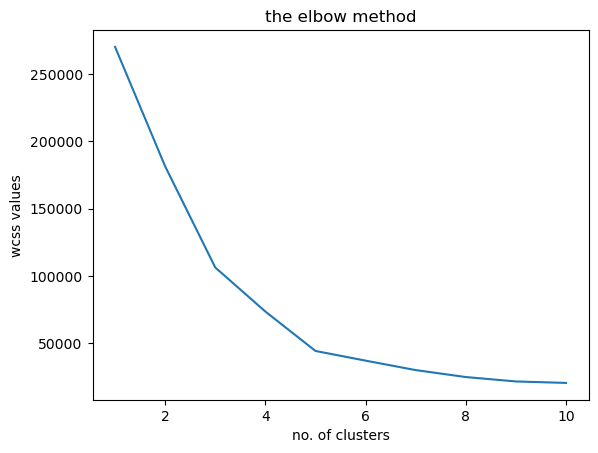

In [56]:
plt.plot(range(1,11),wcss)
plt.title("the elbow method")
plt.xlabel("no. of clusters")
plt.ylabel("wcss values")
plt.show()

In [57]:
kmeansmodel = KMeans(n_clusters= 5, init ='k-means++', random_state=0)
y_kmeans= kmeansmodel.fit_predict(x)

C:\Users\DELL\anaconda3\pp\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\pp\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


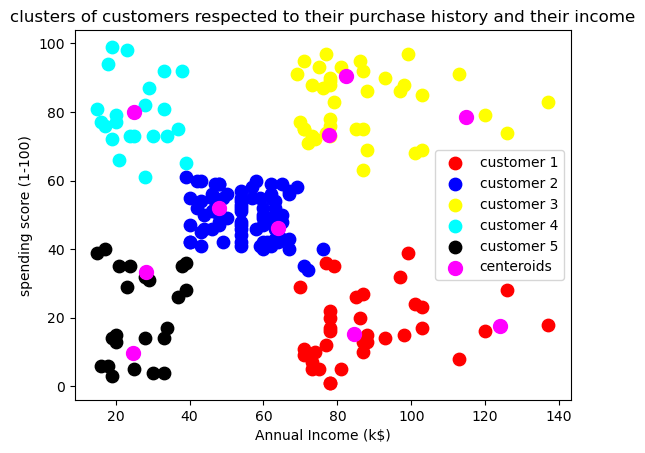

In [62]:
plt.scatter(x[y_kmeans == 0,0],x[y_kmeans == 0,1], s= 80, c= "red", label="customer 1")
plt.scatter(x[y_kmeans == 1,0],x[y_kmeans == 1,1], s= 80, c= "blue", label="customer 2")
plt.scatter(x[y_kmeans == 2,0],x[y_kmeans == 2,1], s= 80, c= "yellow", label="customer 3")
plt.scatter(x[y_kmeans == 3,0],x[y_kmeans == 3,1], s= 80, c= "cyan", label="customer 4")
plt.scatter(x[y_kmeans == 4,0],x[y_kmeans == 4,1], s= 80, c= "black", label="customer 5")
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],s=100, c = "magenta", label = "centeroids")
plt.title("clusters of customers respected to their purchase history and their income")
plt.xlabel("Annual Income (k$)")
plt.ylabel("spending score (1-100)")
plt.legend()
plt.show()